# Estación Farolillo

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from itertools import product

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

In [4]:
df = pd.read_csv("../../data/df_18.csv", index_col=0)
df.index = pd.to_datetime(df.index)

In [5]:
df.head()

,NO2
month,
2013-01-01,43.032258
2013-02-01,32.741935
2013-03-01,26.161290
2013-04-01,24.419355
2013-05-01,25.000000


### Estacionalidad

In [6]:
df2 = df.copy()

In [7]:
df2["año"] = df.index.year
df2["mes"] = df.index.month

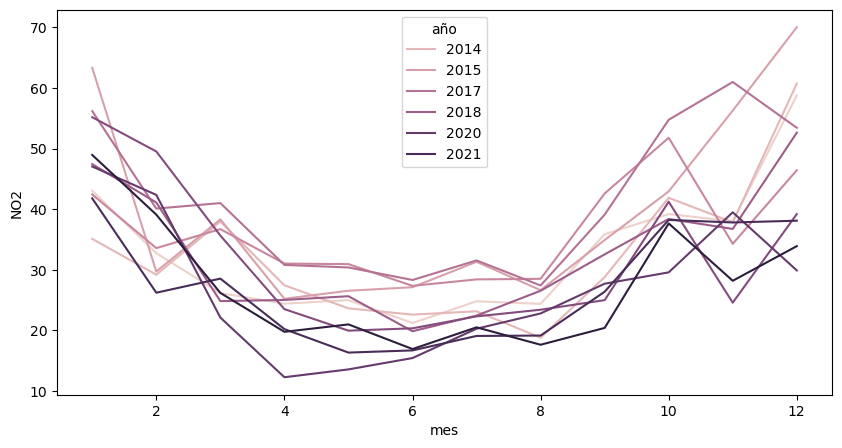

In [8]:
sns.lineplot(x = "mes", y = "NO2", hue = "año", data = df2);

### Estacionaridad

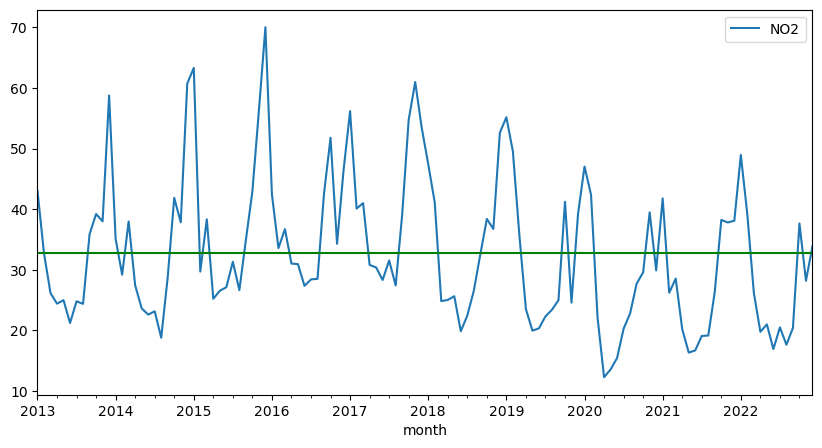

In [9]:
df.plot()
plt.axhline(df.NO2.mean(), c = "g");

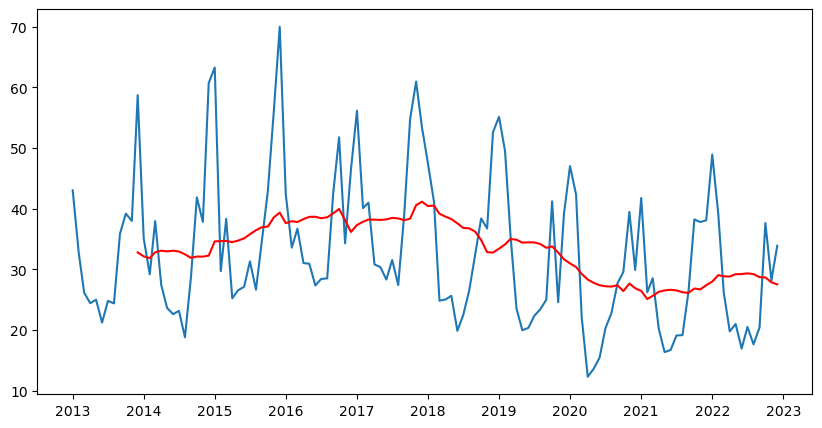

In [10]:
plt.plot(df["NO2"])
plt.plot(df.rolling(window= 12).mean(), c = "r");

In [11]:
df.head()

,NO2
month,
2013-01-01,43.032258
2013-02-01,32.741935
2013-03-01,26.161290
2013-04-01,24.419355
2013-05-01,25.000000


In [12]:
df2.head()

,NO2,año,mes
month,,,
2013-01-01,43.032258,2013,1
2013-02-01,32.741935,2013,2
2013-03-01,26.161290,2013,3
2013-04-01,24.419355,2013,4
2013-05-01,25.000000,2013,5


In [13]:
df3 = df.copy()

In [14]:
df3["year"] = df3.index.year
df3["month"] = df2.index.month
df3.head()

,NO2,year,month
month,,,
2013-01-01,43.032258,2013,1
2013-02-01,32.741935,2013,2
2013-03-01,26.161290,2013,3
2013-04-01,24.419355,2013,4
2013-05-01,25.000000,2013,5


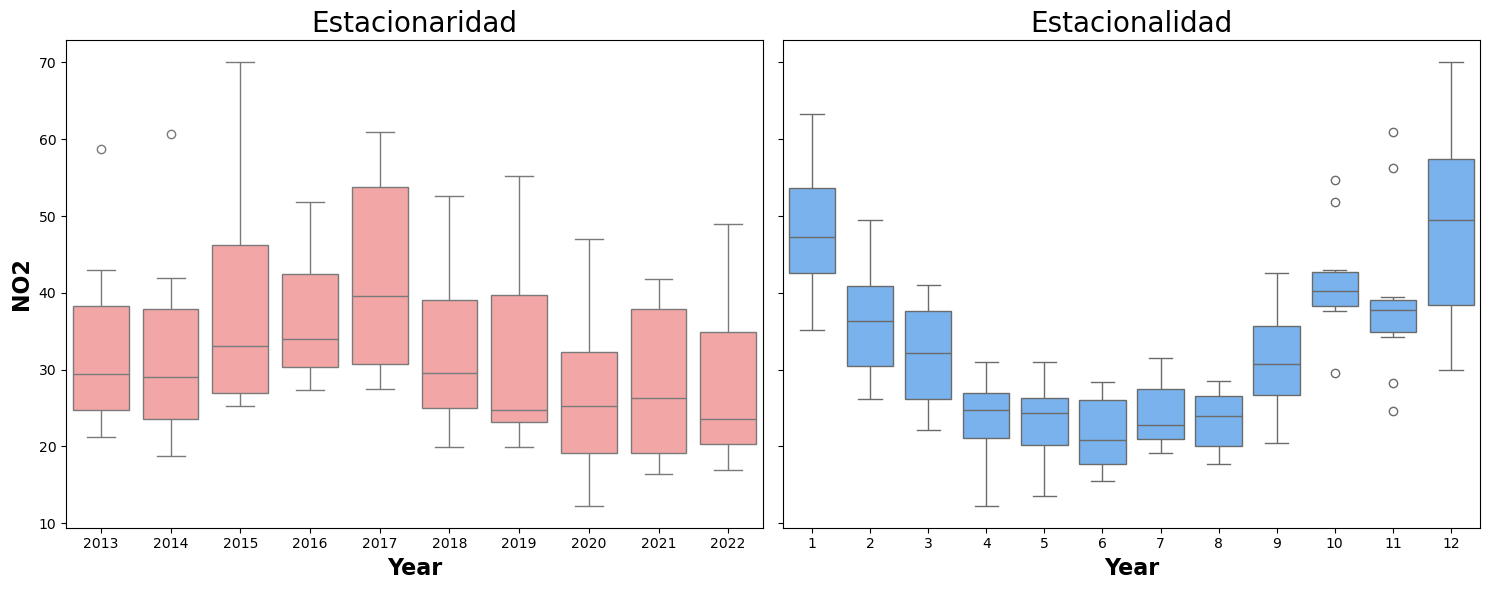

In [15]:
# Nos creamos una lista con las columnas de tiempo
tiempo = df3.columns.drop("NO2")

# Iniciamos los subplots
fig, ax = plt.subplots(nrows=1, ncols=len(tiempo), figsize=(15, 6), sharey=True)

# Nombres personalizados para los títulos
nombres = ["Estacionaridad", "Estacionalidad"]

# Colores bonitos para los boxplots
colores = ["#FF9999", "#66B2FF"]  # Puedes modificar estos códigos de colores

# Hacemos un loop para crear los boxplots para cada año
for i, col in enumerate(tiempo):
    sns.boxplot(data=df3, x=col, y="NO2", ax=ax[i], palette=[colores[i]])
    ax[i].set_title(nombres[i], fontsize=20, loc='center')
    ax[i].set_xlabel('Year', fontsize=16, fontdict=dict(weight='bold'))
    ax[i].set_ylabel('NO2', fontsize=16, fontdict=dict(weight='bold'))

plt.tight_layout()
plt.show()

No hay estacionaridad.

El de estacionalidad estudia todos los eneros, febreros,... de mis años muestra.

La aplicación de la estacionalidad (por ejemplo, a través de un modelo SARIMA con un parámetro estacional) sigue siendo relevante para comprender los patrones recurrentes en tus datos a lo largo del tiempo. Sin embargo, los desplazamientos o irregularidades en la mediana podrían indicar:

Cambios en los patrones estacionales: Las variaciones en la mediana podrían señalar cambios en los patrones estacionales a lo largo del tiempo. Esto puede requerir una exploración adicional para comprender si estas variaciones son anómalas o representan cambios genuinos en la estacionalidad.

Anomalías o eventos atípicos: La presencia de valores atípicos o eventos inusuales en los datos estacionales puede afectar la representación visual de la estacionalidad. Estos eventos pueden causar que la mediana no esté centrada en el boxplot.

En resumen, aunque la mediana desplazada en un boxplot puede indicar cierta variabilidad o cambios en los patrones estacionales, aún puedes aplicar el análisis estacional para comprender los ciclos recurrentes en tus datos. Sin embargo, es importante considerar las posibles anomalías o cambios en los datos que podrían estar afectando la representación visual de la estacionalidad.

### Test de Fuller

In [16]:
res = adfuller(df["NO2"])
res

(-0.6761024866551488,
 0.852842814534798,
 11,
 108,
 {'1%': -3.4924012594942333,
  '5%': -2.8886968193364835,
  '10%': -2.5812552709190673},
 735.3285996715873)

In [17]:
print("AD Fuller Stats", res[0])
print("p-value", res[1])
print("Critical values")

for k, v in res[4].items():
    print(k, round(v, 2))

AD Fuller Stats -0.6761024866551488
p-value 0.852842814534798
Critical values
1% -3.49
5% -2.89
10% -2.58


*Datos no estacionarios. Su media y su varianza están en función del tiempo 🍋*

### Autocorrelación

In [18]:
for i in range(49):
    print(f"{i} mes Lag, {df['NO2'].autocorr(lag= i)}")

0 mes Lag, 1.0
1 mes Lag, 0.6648604030635712
2 mes Lag, 0.3875369324612684
3 mes Lag, 0.13578773455956855
4 mes Lag, -0.17486448074977293
5 mes Lag, -0.3611079100089217
6 mes Lag, -0.42516580787819913
7 mes Lag, -0.39056561331242634
8 mes Lag, -0.2269951006143854
9 mes Lag, 0.09270812992851311
10 mes Lag, 0.37335503045551793
11 mes Lag, 0.5659251369522231
12 mes Lag, 0.7230630924022202
13 mes Lag, 0.641733576573084
14 mes Lag, 0.39706186840288993
15 mes Lag, 0.14836665548153385
16 mes Lag, -0.1714986388546181
17 mes Lag, -0.3763150384609268
18 mes Lag, -0.4552517652798308
19 mes Lag, -0.40915941080097956
20 mes Lag, -0.23898367759682435
21 mes Lag, 0.052041438507764874
22 mes Lag, 0.2649042316669648
23 mes Lag, 0.5352944020496675
24 mes Lag, 0.71395812238177
25 mes Lag, 0.5433083948996164
26 mes Lag, 0.310692407640381
27 mes Lag, 0.05855104589628883
28 mes Lag, -0.2654726733189047
29 mes Lag, -0.47816129394556556
30 mes Lag, -0.5738331077145995
31 mes Lag, -0.5146402731948692
32 mes La

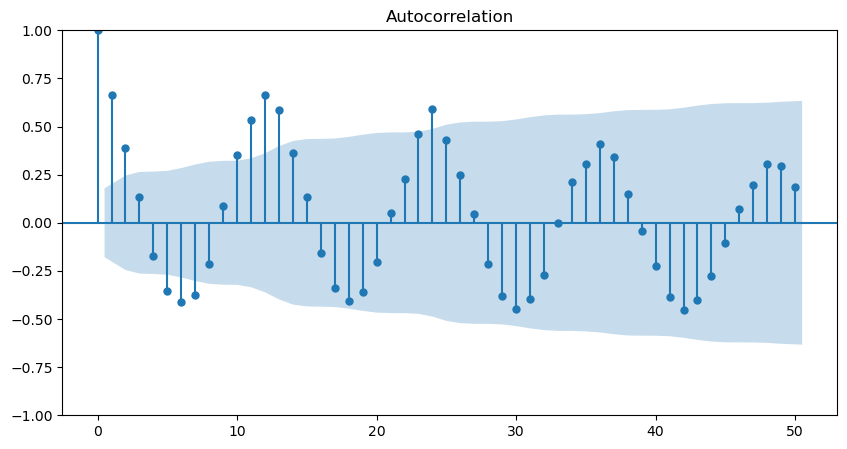

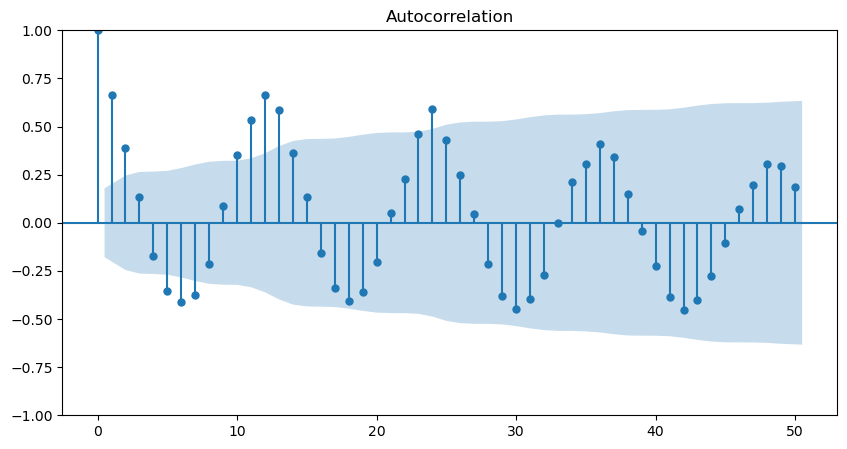

In [19]:
plot_acf(df, lags = 50)

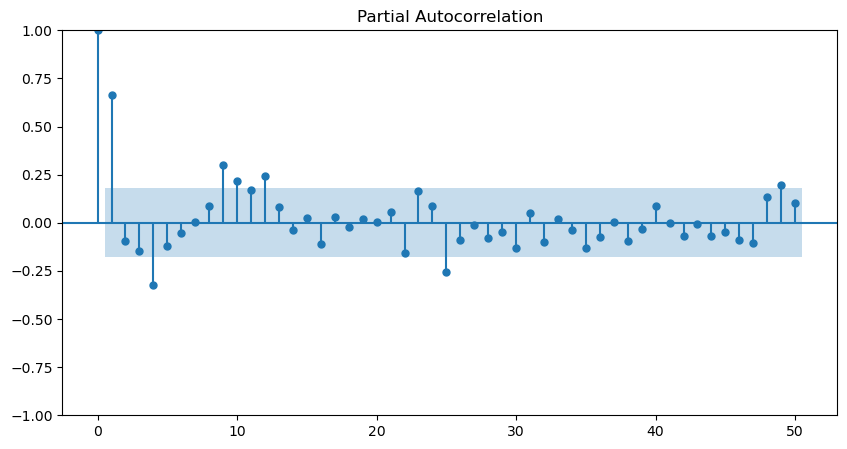

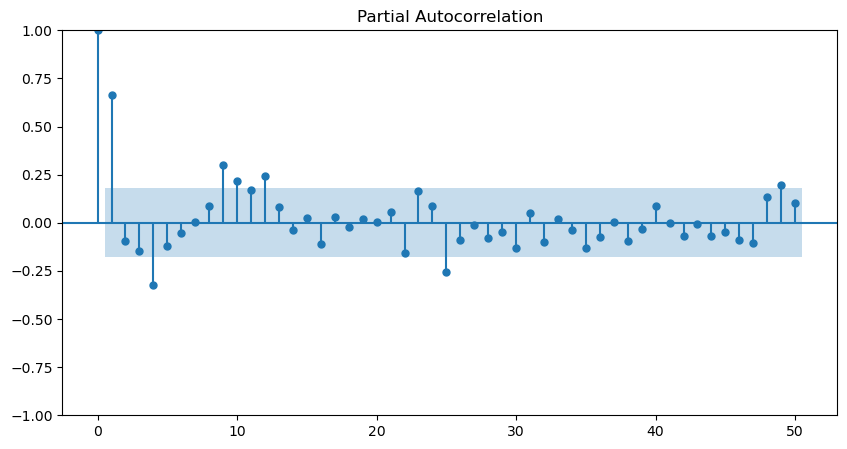

In [20]:
plot_pacf(df, lags = 50)

In [21]:
df.head()

,NO2
month,
2013-01-01,43.032258
2013-02-01,32.741935
2013-03-01,26.161290
2013-04-01,24.419355
2013-05-01,25.000000


In [22]:
df.shape

(120, 1)

In [23]:
df.isnull().sum()

NO2    0
dtype: int64

### SARIMA

In [24]:
y_test = df["NO2"][-30:]
y_train = df["NO2"][:-30]

In [25]:
ps = range(4)
ds = range(1,3)
qs = range(3)

parameters = list(product(ps,ds, qs))
print(parameters)

[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 2, 0), (3, 2, 1), (3, 2, 2)]


In [26]:
%%time
rmse = []
order = []
for p, d, q in tqdm(parameters):
    try:
        modelo=ARIMA(y_train, order=(p, d, q)).fit()
        pred = modelo.predict(start=len(y_train), end=len(df) -1)
        error = np.sqrt(np.mean(mean_squared_error(y_test, pred)))
        rmse.append(error)
        order.append((p,d, q))
    except: 
        continue

  0%|          | 0/24 [00:00<?, ?it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_

C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 62%|██████▎   | 15/24 [00:00<00:00, 22.38it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\

CPU times: total: 625 ms
Wall time: 1.23 s


In [27]:
# veamos los resultados de todos los modelos
results = pd.DataFrame({"RMSE": rmse, "order": order})
results.sort_values(by="RMSE", inplace=True)
results.head()

,RMSE,order
7,10.495560,"(1, 1, 1)"
14,10.580262,"(2, 1, 2)"
8,10.615865,"(1, 1, 2)"
20,10.652440,"(3, 1, 2)"
2,14.249552,"(0, 1, 2)"


In [28]:
%%time

modelo=SARIMAX(endog=y_train, 
               exog=None,
               #order=(1, 1, 1),  # modelo arima
               seasonal_order=(1, 1, 1, 12) # modelo sarima, estacionalidad es el último valor
              ).fit(disp=False)
                     
pred=modelo.predict(len(y_train), len(df)-1)  

error=(pred-y_test).abs().sum()/len(pred) 
print ('Error mae: ', error)


res=pd.DataFrame({'real':y_test, 'pred':pred, 'error':pred-y_test})
res

C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Error mae:  5.009389050887151
CPU times: total: 46.9 ms
Wall time: 87.3 ms


,real,pred,error
2020-07-01,20.290323,20.895127,0.604804
2020-08-01,22.806452,24.450901,1.644450
2020-09-01,27.709677,30.256092,2.546414
2020-10-01,29.580645,40.938717,11.358072
2020-11-01,39.483871,34.823424,-4.660447
2020-12-01,29.903226,48.006103,18.102877
2021-01-01,41.774194,51.596865,9.822671
2021-02-01,26.225806,46.026901,19.801095
2021-03-01,28.548387,30.077173,1.528786
2021-04-01,20.225806,19.970084,-0.255722


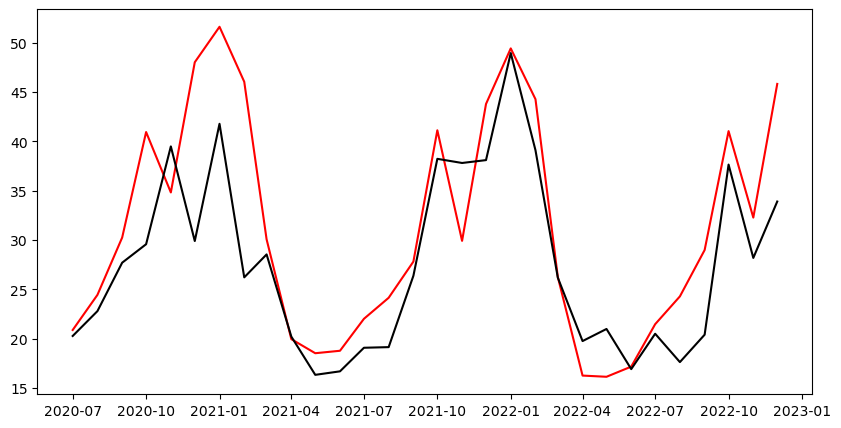

In [29]:
plt.plot(res["pred"], c = "r")
plt.plot(res["real"], c = "black");

In [30]:
pred["real_test"] = y_test

In [31]:
pred_año = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 9))
pred_año

,predicted_mean
2023-01-01,50.459451
2023-02-01,45.111185
2023-03-01,28.093551
2023-04-01,18.053229
2023-05-01,17.304756
2023-06-01,17.958571
2023-07-01,21.744881
2023-08-01,24.230810
2023-09-01,28.429547
2023-10-01,41.073477


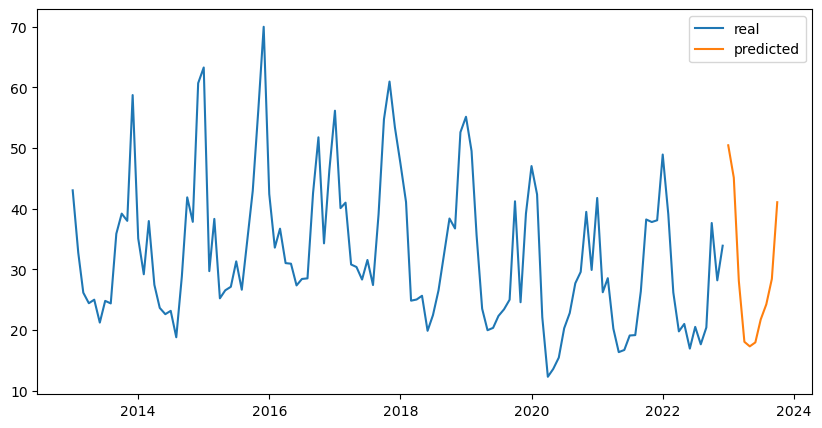

In [32]:
plt.plot(df)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [33]:
pred_año

,predicted_mean
2023-01-01,50.459451
2023-02-01,45.111185
2023-03-01,28.093551
2023-04-01,18.053229
2023-05-01,17.304756
2023-06-01,17.958571
2023-07-01,21.744881
2023-08-01,24.230810
2023-09-01,28.429547
2023-10-01,41.073477


## Datos reales 2023

In [34]:
df23 = pd.read_csv("../../data/emisiones23.csv")

In [35]:
df23.head()

,Unnamed: 0,ESTACION,ANO,MES,NO2
0,0,4,2023,1,32.516129
1,1,4,2023,2,36.741935
2,2,4,2023,3,27.806452
3,3,4,2023,4,22.838710
4,4,4,2023,5,16.612903


### Elijo la estación correspondiente

In [36]:
df_18_23 = df23[df23["ESTACION"] == 18]
df_18_23

,Unnamed: 0,ESTACION,ANO,MES,NO2
49,49,18,2023,1,33.516129
50,50,18,2023,2,35.387097
51,51,18,2023,3,25.322581
52,52,18,2023,4,19.903226
53,53,18,2023,5,15.870968
54,54,18,2023,6,19.516129
55,55,18,2023,7,18.903226
56,56,18,2023,8,18.548387
57,57,18,2023,9,27.548387
58,58,18,2023,10,30.451613


In [37]:
import sys
sys.path.append('../../src')

from clean_support import NO2_clean, estacion_timeseries

In [38]:
estacion_timeseries(df_18_23)

,Unnamed: 0,NO2
month,,
2023-01-01,49,33.516129
2023-02-01,50,35.387097
2023-03-01,51,25.322581
2023-04-01,52,19.903226
2023-05-01,53,15.870968
2023-06-01,54,19.516129
2023-07-01,55,18.903226
2023-08-01,56,18.548387
2023-09-01,57,27.548387


In [39]:
df_18_23.drop("Unnamed: 0", axis=1, inplace=True)

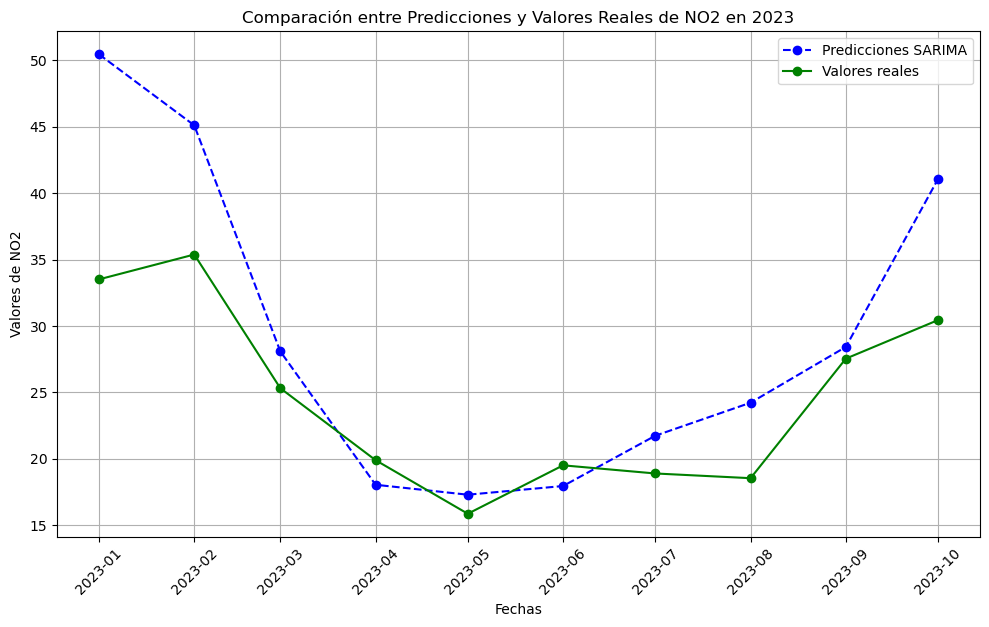

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que pred_año y df_08_23 son tus DataFrames con las predicciones y los valores reales respectivamente
# Asegúrate de tener las fechas como índices y las columnas 'predicted_mean' y 'NO2' disponibles

# Convertir las columnas de fechas a objetos datetime si es necesario
pred_año.index = pd.to_datetime(pred_año.index)
df_18_23.index = pd.to_datetime(df_18_23.index)

# Filtrar los datos de 2023 para enero a octubre
predicciones_2023 = pred_año['predicted_mean']['2023-01':'2023-10']
valores_reales_2023 = df_18_23['NO2']['2023-01':'2023-10']

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(predicciones_2023.index, predicciones_2023, color='blue', label='Predicciones SARIMA', linestyle='--', marker='o')
plt.plot(valores_reales_2023.index, valores_reales_2023, color='green', label='Valores reales', linestyle='-', marker='o')

# Añadir etiquetas, título y leyenda
plt.xlabel('Fechas')
plt.ylabel('Valores de NO2')
plt.title('Comparación entre Predicciones y Valores Reales de NO2 en 2023')
plt.legend()

# Mejorar el diseño
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)  # Rotar las fechas para mayor legibilidad

# Mostrar la gráfica
plt.show()

In [41]:
pred_año["predicted_mean"]
df_18_23["NO2"]

month
2023-01-01    33.516129
2023-02-01    35.387097
2023-03-01    25.322581
2023-04-01    19.903226
2023-05-01    15.870968
2023-06-01    19.516129
2023-07-01    18.903226
2023-08-01    18.548387
2023-09-01    27.548387
2023-10-01    30.451613
Freq: MS, Name: NO2, dtype: float64

### Estimación cierre 2023

In [42]:
pred_año_total = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 11))
pred_año_total

,predicted_mean
2023-01-01,50.459451
2023-02-01,45.111185
2023-03-01,28.093551
2023-04-01,18.053229
2023-05-01,17.304756
2023-06-01,17.958571
2023-07-01,21.744881
2023-08-01,24.230810
2023-09-01,28.429547
2023-10-01,41.073477


In [43]:
# Obtener las dos últimas filas de pred_año_total
ultimas_filas_pred_año = pred_año_total.tail(2)

# Renombrar la columna 'predicted_mean' como 'NO2' en las dos últimas filas
ultimas_filas_pred_año = ultimas_filas_pred_año.rename(columns={'predicted_mean': 'NO2'})

# Añadir las dos últimas filas al final de df_17_23 preservando el índice de fechas
frames = [df_18_23, ultimas_filas_pred_año]
df_extendido = pd.concat(frames)

# Verificar el DataFrame extendido
df_extendido

,NO2
2023-01-01,33.516129
2023-02-01,35.387097
2023-03-01,25.322581
2023-04-01,19.903226
2023-05-01,15.870968
2023-06-01,19.516129
2023-07-01,18.903226
2023-08-01,18.548387
2023-09-01,27.548387
2023-10-01,30.451613


In [51]:
df_predict23 = df_extendido.mean()
df_predict23

NO2    26.745519
dtype: float64

In [52]:
dff = df_predict23.to_frame()

In [53]:
dff = dff.rename(columns={0: "Farolillo"})

In [54]:
dff

,Farolillo
NO2,26.745519


In [55]:
dff.to_csv('../../clean_visuals/predicts23/18_Farolillo.csv', index=True)